In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

%matplotlib inline

from pathlib import Path
import sys

import xarray as xr
import os as os
import glob
import matplotlib.gridspec as gridspec
import metpy.calc as mpcalc
from metpy.units import units
import pickle

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import metpy

data_dir = '/work/wicker/MPAS_WRF_W/mpas_20240507'

proj = ccrs.LambertConformal(central_longitude=-85.0, central_latitude=45.0)


In [2]:
prior = xr.open_dataset(os.path.join(data_dir, "wofs_vert_01.restart.2024-05-07_19.00.00_quad.nc"))
analy = xr.open_dataset(os.path.join(data_dir, "wofs_vert_01.analy_quad.nc"))


In [3]:
prior_refl = np.squeeze(prior['refl10cm'].values, 0).max(axis=0)
analy_refl = np.squeeze(analy['refl10cm'].values, 0).max(axis=0)


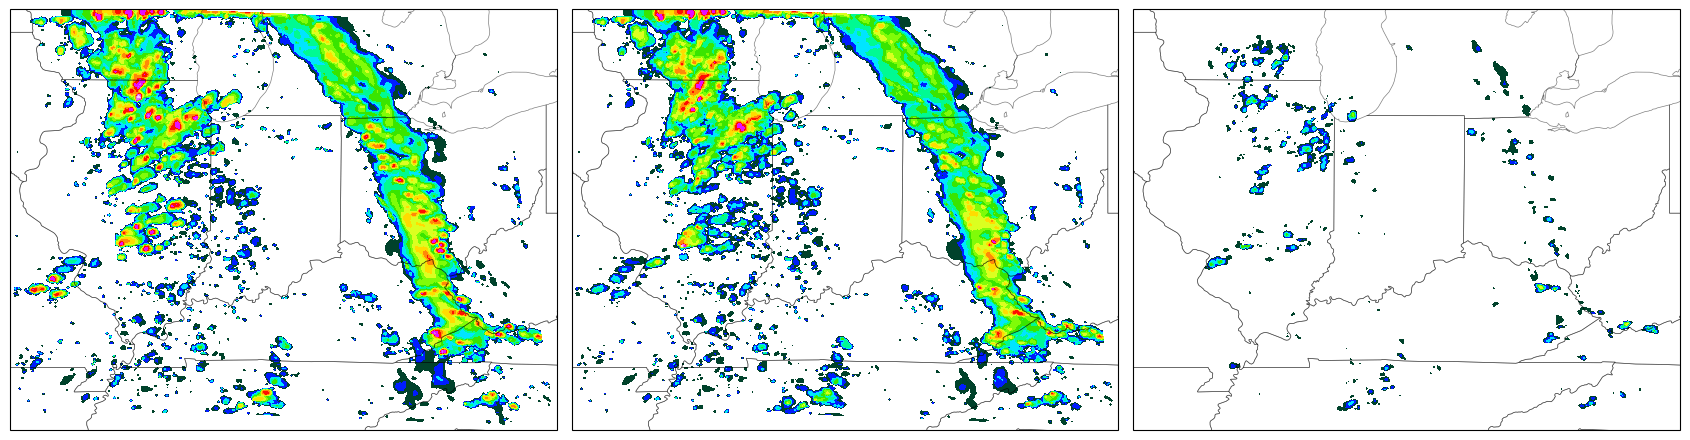

In [4]:

fig, axs = plt.subplots(1, 3, tight_layout=True, figsize=(17,5), subplot_kw={'projection': ccrs.PlateCarree()})

axs[0].contourf(prior.lon, prior.lat, prior_refl,cmap='gist_ncar',levels=np.arange(5,75,5), transform=ccrs.PlateCarree())
axs[0].add_feature(cfeature.STATES, linewidth=0.5, alpha=0.5)

axs[1].contourf(prior.lon, prior.lat, analy_refl,cmap='gist_ncar',levels=np.arange(5,75,5), transform=ccrs.PlateCarree())
axs[1].add_feature(cfeature.STATES, linewidth=0.5, alpha=0.5)
axs[2].contourf(prior.lon, prior.lat, analy_refl-prior_refl,cmap='gist_ncar',levels=np.arange(5,75,5), transform=ccrs.PlateCarree())
axs[2].add_feature(cfeature.STATES, linewidth=0.5, alpha=0.5);

In [5]:
files = ['MPASSIT_01.2024-05-07_19.05.00.nc', 
         'MPASSIT_01.2024-05-07_19.10.00.nc', 
         'MPASSIT_01.2024-05-07_19.15.00.nc',
         'MPASSIT_01.2024-05-07_19.20.00.nc',
         'MPASSIT_01.2024-05-07_19.25.00.nc',
         'MPASSIT_01.2024-05-07_19.30.00.nc',
        ]

In [9]:
plt.figure(figsize=[8, 8])
axs = plt.axes(projection=ccrs.PlateCarree())

data_refl = np.squeeze(prior['refl10cm'].values, 0)[10]
data_refl = np.where(data_refl > 25, data_refl, 0.0)
axs.contourf(prior.lon, prior.lat, data_refl,cmap='gist_ncar', levels=np.arange(5,75,5), transform=ccrs.PlateCarree())
axs.add_feature(cfeature.STATES, linewidth=0.5, alpha=0.5)
axs.gridlines(draw_labels=True)
axs.set_ylim(38., 43.5)
axs.set_xlim(-92, -85)

%matplotlib notebook

out = widgets.Output()
@out.capture()
def onclick(event):
    print(event)
    axs.set_title('%s click: button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %
          ('double' if event.dblclick else 'single', event.button,
           event.x, event.y, event.xdata, event.ydata))
display(out)
fig.canvas.mpl_connect('button_press_event', onclick)

<IPython.core.display.Javascript object>

Output()

15

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
%matplotlib widget
t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2 * np.pi * t)
fig, ax = plt.subplots()
ax.plot(t, s)
out = widgets.Output()

@out.capture()
def onclick(event):
    print(event)
    ax.set_title('%s click: button=%d, x=%d, y=%d, xdata=%f, ydata=%f' %
          ('double' if event.dblclick else 'single', event.button,
           event.x, event.y, event.xdata, event.ydata))
display(out)
cid = fig.canvas.mpl_connect('button_press_event', onclick)

<IPython.core.display.Javascript object>

Output()

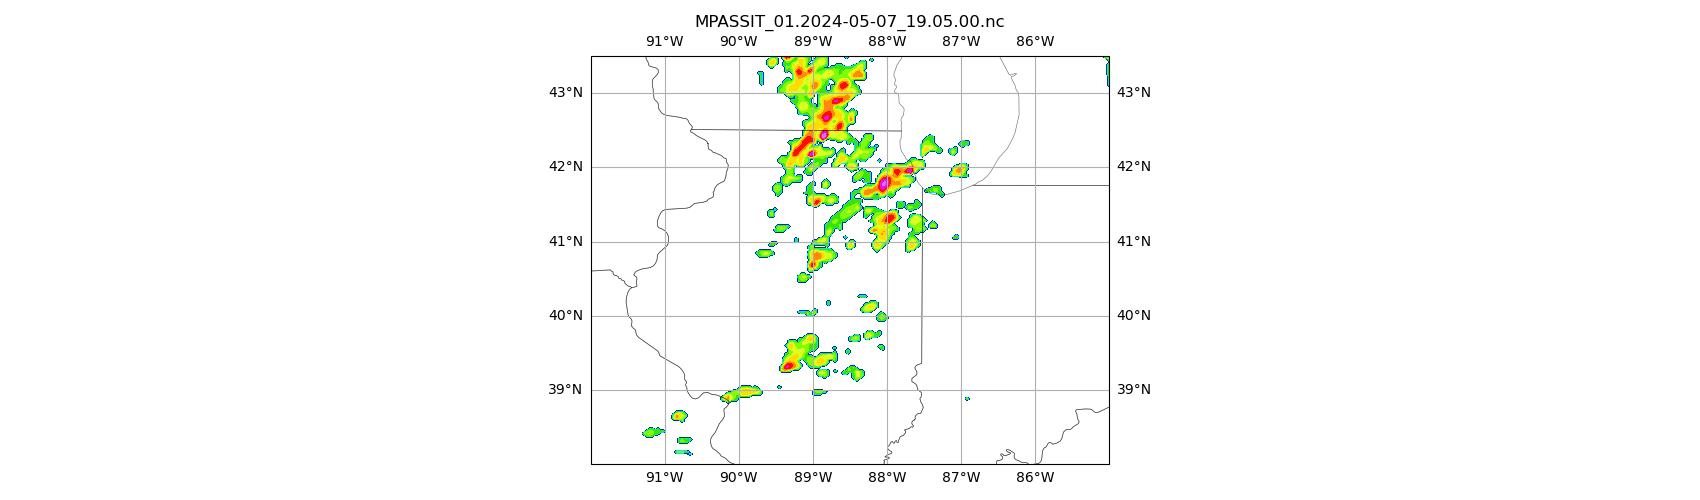

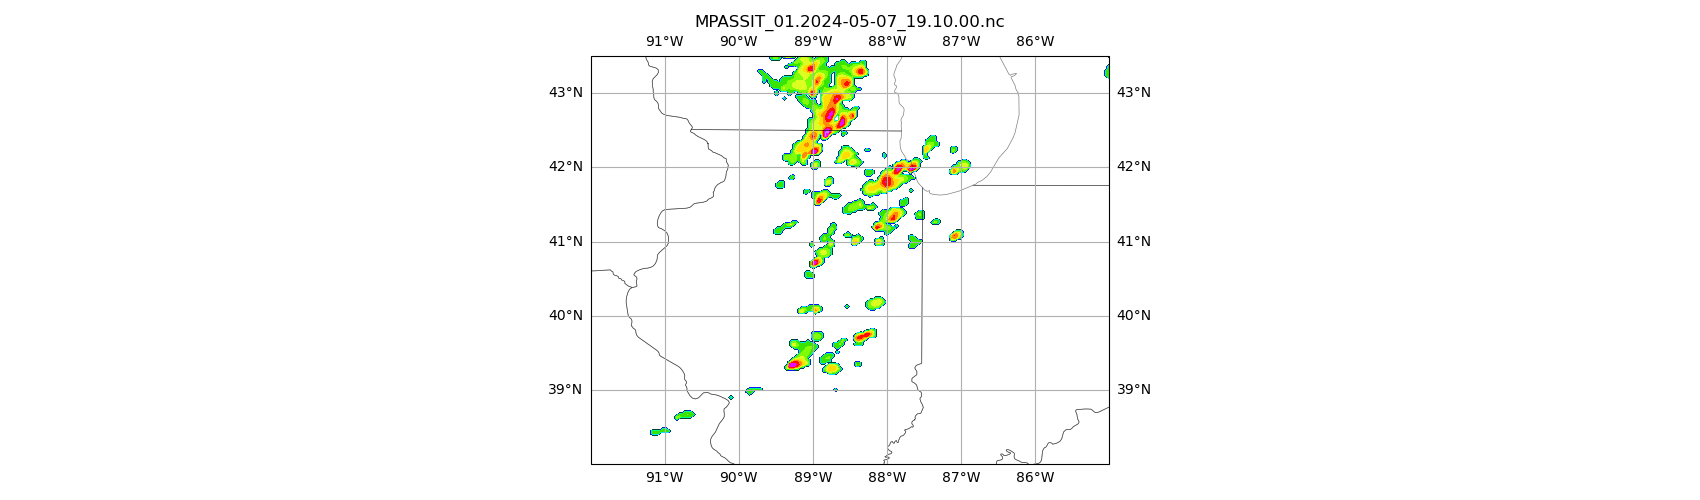

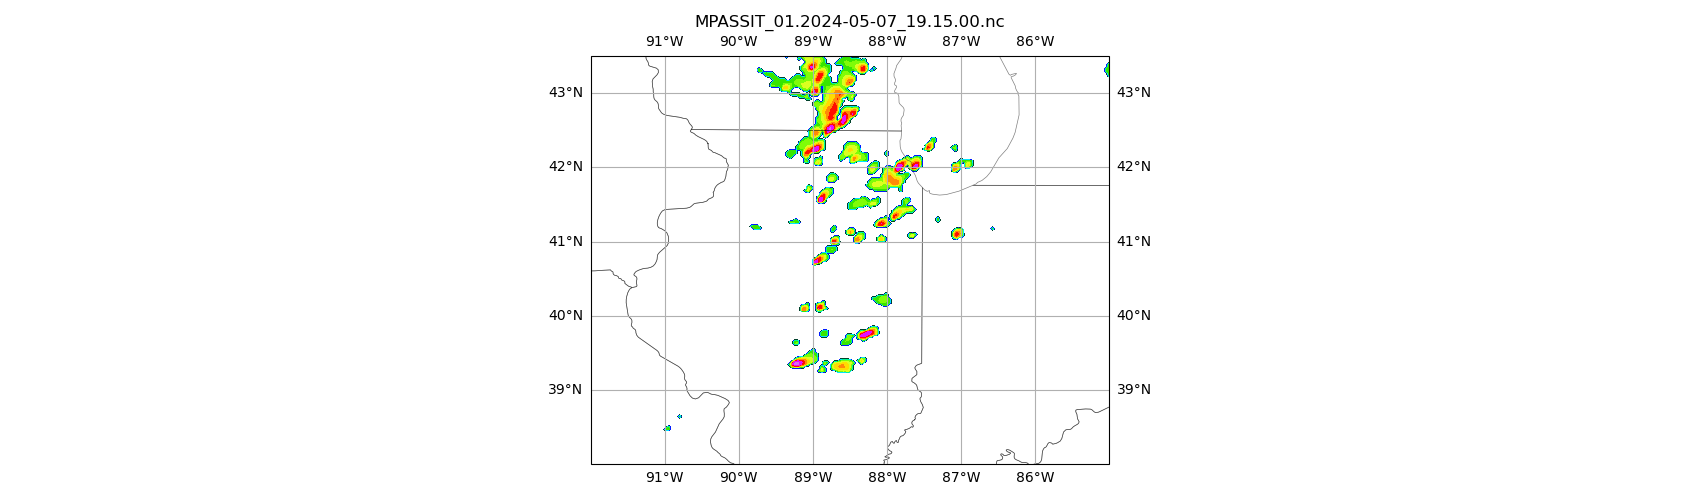

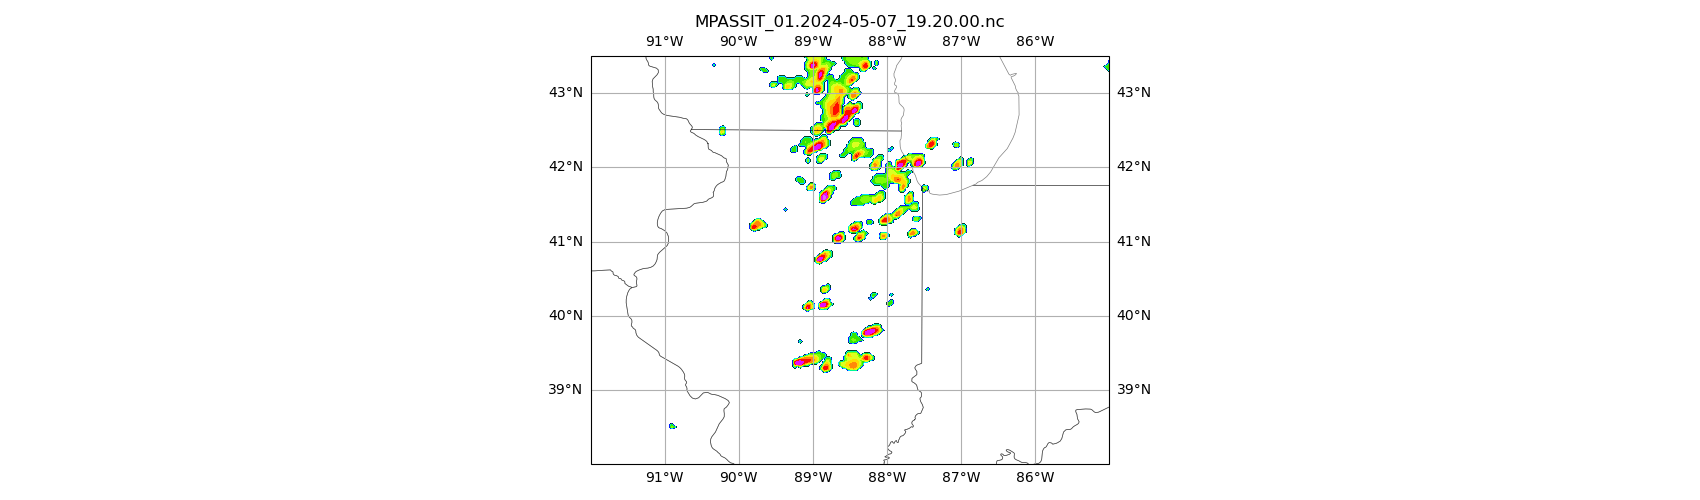

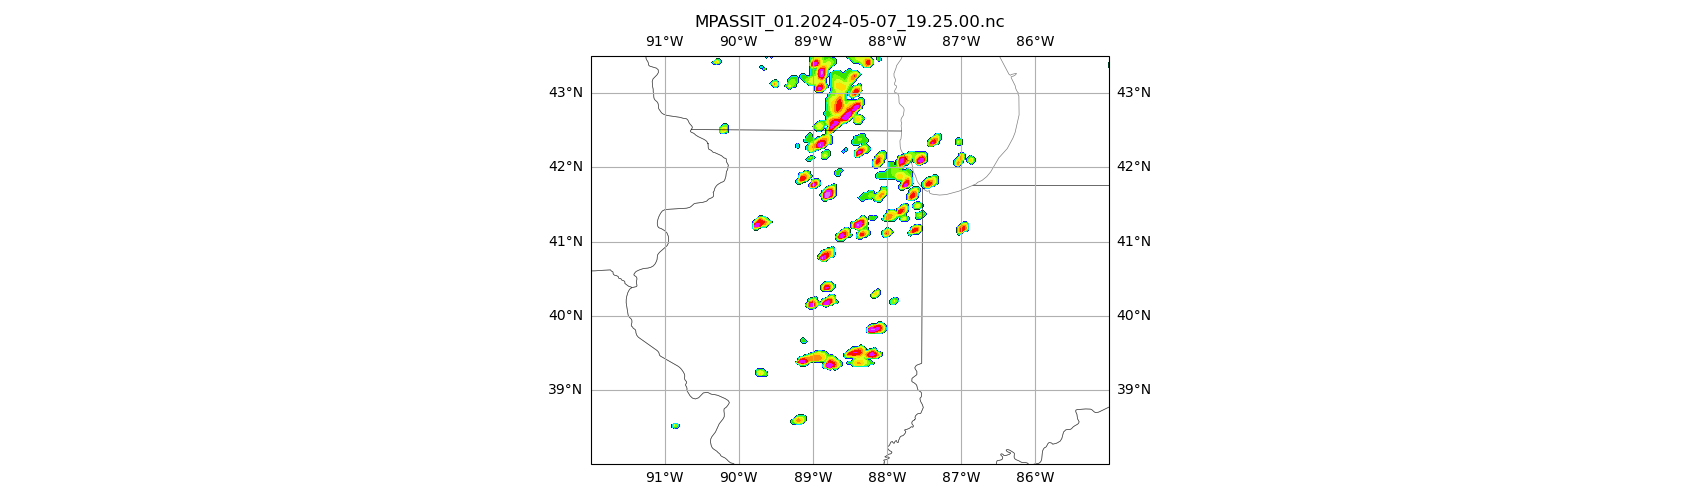

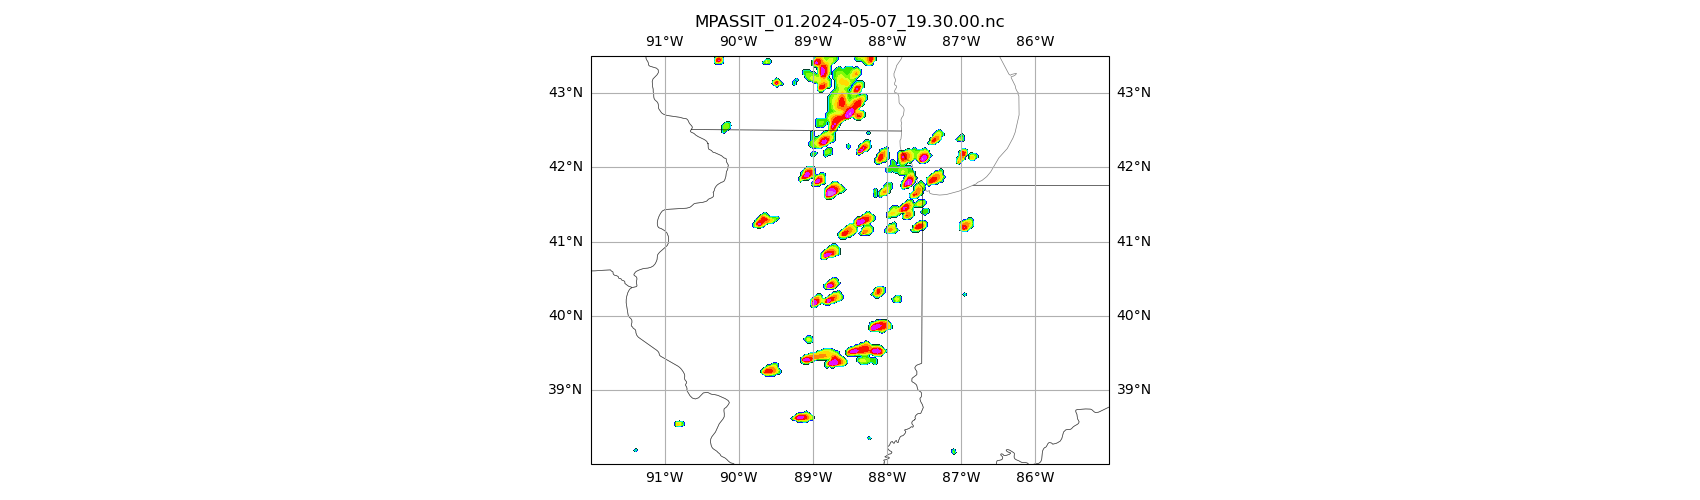

In [7]:
for file in files:
    data = xr.open_dataset(os.path.join(data_dir, file))
    data_refl = np.squeeze(data['REFL_10CM'].values, 0)[10]
    data_refl = np.where(data_refl > 25, data_refl, 0.0)
    fig, axs = plt.subplots(1, 1, tight_layout=True, figsize=(17,5), subplot_kw={'projection': ccrs.PlateCarree()})

    axs.contourf(prior.lon, prior.lat, data_refl,cmap='gist_ncar',levels=np.arange(5,75,5), transform=ccrs.PlateCarree())
    axs.add_feature(cfeature.STATES, linewidth=0.5, alpha=0.5)
    axs.gridlines(draw_labels=True)
    axs.set_ylim(38., 43.5)
    axs.set_xlim(-92, -85)

    plt.title(file)
    data.close()
    fig.canvas.mpl_connect('button_press_event', onclick)


Text(0.5, 1.0, 'U Difference Field for k=10\nMax: 0.000000 Min 0.000000')

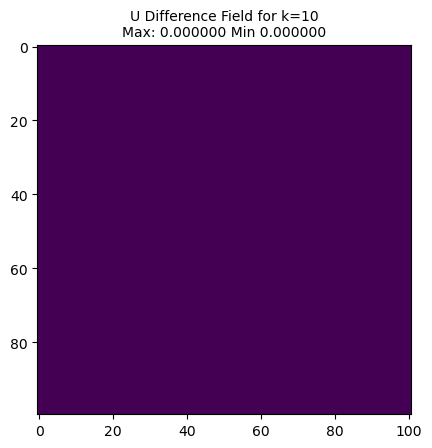